In [5]:
import pandas as pd
import numpy as np
import urllib.request
import os
import shutil
import PIL
from PIL import Image
import tensorflow as tf
import socket
import random

import subprocess
import os
import argparse
from tensorflow.io import gfile
import imagenet_and_broden_fetcher as fetcher


In [12]:
# broden dataset definition
#objects, scenes, object parts,textures, and materials in a variety of contexts

In [2]:
# kImagenetBaseUrl = "http://imagenet.stanford.edu/api/imagenet.synset.geturls?wnid="
kMinFileSize = 10000

data_path = "../dataset/"
kBrodenTexturesPath = 'broden1_224/images/dtd/'
broden_textures_path = os.path.join(data_path, kBrodenTexturesPath)

In [3]:
#print available concepts 
from collections import Counter

for root, dirs, files in os.walk(broden_textures_path):
    files = [a for a in files if "color" not in a]
    texture_files = Counter([a.split("_")[0] for a in files])
print(texture_files)

Counter({'studded': 120, 'zigzagged': 120, 'fibrous': 120, 'waffled': 120, 'marbled': 120, 'lacelike': 120, 'meshed': 120, 'veined': 120, 'polka-dotted': 120, 'bubbly': 120, 'lined': 120, 'woven': 120, 'stratified': 120, 'honeycombed': 120, 'banded': 120, 'gauzy': 120, 'porous': 120, 'scaly': 120, 'cracked': 120, 'knitted': 120, 'flecked': 120, 'spiralled': 120, 'swirly': 120, 'paisley': 120, 'blotchy': 120, 'crosshatched': 120, 'potholed': 120, 'braided': 120, 'cobwebbed': 120, 'matted': 120, 'freckled': 120, 'sprinkled': 120, 'perforated': 120, 'grid': 120, 'striped': 120, 'stained': 120, 'grooved': 120, 'pitted': 120, 'chequered': 120, 'bumpy': 120, 'wrinkled': 120, 'smeared': 120, 'frilly': 120, 'pleated': 120, 'dotted': 120, 'interlaced': 120, 'crystalline': 120})


In [8]:
#potentially interesting concepts
# checkered
#(cracked)
#dotted
#groved 
#knitted
#scaly for fish
#smeared for painting
#spiraled for painting
#veined for plants

In [8]:
#TODO-- related textures generate similar CAVS?

#!mkdir ../dataset/tcav
#!mkdir  ../dataset/tcav/concepts
 
conceptsPath = 'tcav/concepts'
saving_path = os.path.join(data_path, conceptsPath)

In [8]:
broden_textures_path = os.path.join(data_path, kBrodenTexturesPath)
# fetcher.download_texture_to_working_folder(data_path, saving_path,"scaly", 100)

INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: scaly
INFO:tensorflow:We have 120 images for the concept scaly


In [10]:
imagenet_dataframe = fetcher.make_imagenet_dataframe("imagenet_url_map.csv")


In [4]:
##Make texture and random concepts

def make_concepts_from_imagenet(source_dir, saving_path, imagenet_classes, number_of_images_per_folder):
    # Run script to download data to source_dir
    if not gfile.exists(source_dir):
        gfile.makedirs(source_dir)
    if not gfile.exists(os.path.join(source_dir,'broden1_224/')) or not gfile.exists(os.path.join(source_dir,'inception5h')):
        subprocess.call(['bash' , 'FetchDataAndModels.sh', source_dir])

    # Determine classes that we will fetch

    # make targets from imagenet
    imagenet_dataframe = fetcher.make_imagenet_dataframe("./imagenet_url_map.csv")
    for image in imagenet_classes:
        try: 
            fetcher.fetch_imagenet_class(source_dir, image, number_of_images_per_folder, imagenet_dataframe)
    
        except:
            print("no images in Imagenet for concept {image}")
            pass

In [5]:
# #Function to clean concepts for images 
# saving_dir = "/home/valentinedhauteville/dataset/tcav/concepts/random_all"

# for saving_path in os.listdir(saving_dir):
#     filename = os.path.join(saving_dir, saving_path)
#     try:
#     # Throw an exception if the image is unreadable or corrupted
#         Image.open(filename).verify()

#     # Remove images smaller than 10kb, to make sure we are not downloading empty/low quality images
#         if tf.io.gfile.stat(filename).length < kMinFileSize:
#             tf.io.gfile.remove(filename)
#     # PIL.Image.verify() throws a default exception if it finds a corrupted image.
#     except Exception as e:
#         #os.remove(filename)  # We need to delete it, since urllib automatically saves them.
#         print(f"removed:{filename}")
#         raise e

## Generate high level concepts

In [6]:
# generate high level concepts:
imagenet_classes =  ["light"]
 
make_concepts_from_imagenet(data_path, saving_path, imagenet_classes, 120)


INFO:tensorflow:Fetching imagenet data for light
INFO:tensorflow:Saving images at ../dataset/light


bash: FetchDataAndModels.sh: No such file or directory


INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2008/05/14/s-1210750904.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.sherpa-design.com/images/lightbulb.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/03/28/1139893764.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error timed out> for URL http://shop.aqxx.com.cn/shop/shop100204/uploadimage/product/0842414213172434.gif
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 9-10: ordinal not in range(128) for URL http://www.pyphotogarphy.com/pic/珠江12V%2035W采访机头灯.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 31-33: ordinal not in range(128) 

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.tuincentrumdaniels.nl/Uploaded_files/Assortiment/SG-Licht-en-bewegingssensoren-Verlichting-1187261289.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/05/23/1179910857.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/11/01/s-1156901340.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2006/08/31/s-1156839628.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/04/20/1177048094.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.chinawe.net/upimg/allimg/080516/1950000.jpg
INFO:ten

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/06/22/1182490775.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 31-36: ordinal not in range(128) for URL http://cn.made-in-china.com/image/2f0j01fBiaFKTkgUrOM/半螺旋节能灯.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://img.ruten.com.tw/s2/f/78/68/11080823097448_641.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.denhaag.nl/Pics/dso/RustenburgOostbroek/verlichting.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.chinaed.com.cn/no7/newsmore/200708/27/W020070827316982159695.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for 

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.joosseinterieurs.nl/webedit/paginas/beelden/fotos/verlichting_05.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://viva-9503.so-buy.com/ezfiles/viva-9503/img/pictures/j/JC-18001DA_L_%BA%FB%A8%CA%A5%D5%A5%C9%A4%BB%BFO.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2006/08/04/s-1154680480.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/04/26/s-1177566691.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.cz768.net/czfq/070608.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.cs.ubc.ca/~heidrich/

INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.francotanzarellatendaggi.com/frame/immagini/lume.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.electrostefan.be/beelden/Verlichting2.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.jwfu.com/upload/2008731620283971.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.heb315.com.cn/images/chanpin/ln103.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.my7475.com/wp-content/uploads/2008/02/my747508021507.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error timed out> for URL http://img.2dehands.nl/f/normal/4162

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.directorchina.com/news/upimg/allimg/allimg/070122/1218260.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.dian168.com/uploadpic/product20083/_20080707112303_233453561.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.lecreazionidifiorella.net/3%20LUMI%20RIDIMENSIONATI/LUME-BOTTONI.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 410: Gone for URL http://jc.zhulong.com/chanpin/2008/8/19/366665_1_560.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.yongna.net/data/uploadfile/200605/20060510161814208.bmp
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 73-74: or

INFO:tensorflow:Problem downloading imagenet image. Exception was cannot identify image file '../dataset/light/verlichting_14.jpg' for URL http://www.jacquesclement.nl/uploads/verlichting/verlichting_14.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.emmeluce.it/imgmml/zmet_02.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was cannot identify image file '../dataset/light/redlight1on.jpg' for URL http://ledsgrowinggreen.com/redlight1on.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.zonnepanelen.wouterlood.com/solar_images/led_spotje_02.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.indunet.com.cn/fck/1215676157734/124.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.dbfact.be/m

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.zeovit.com/DTOTQ/EdwardAnzaldua/lighting1.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.scattieparole.it/files/Image/big/lume_di_candela.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://images.jagol.com/images/upload/biz/2007/12/28/13432272aewtrs.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.vendialmeglio.it/images_inserzioni/365/DSCN2787.JPG
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.ceramichecacciagrano.it/immagini/thumb/lume.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://img.b2b.hc360.com/busin/m_9-624-29409624.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.smarthomecn.com/upload/2007_05/070518100920381.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2006/08/31/1156841298.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/02/05/s-1166092729.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.jc-light.com.tw/ezfiles/viva-9503/img/pictures/j/JC-8229-2L_L_%AAQ%B8%AD%B9%CF%C4%CB%A9M%AB%C7-5%BFO%A4j.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL ht

INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.pietvanderwee.be/upload-images/magnumINTlampen_1.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.dianyuan.com/sale/d/o/65/656016.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 19-23: ordinal not in range(128) for URL http://homeimg.focus.cn/photo/1159266/阳台大灯关.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.presepi.com/imgprodotti/filcos/grandi/lumi/lume_da_carro.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 33-40: ordinal not in range(128) for URL http://cn.made-in-china.com/image/2f0j01MvIQaAdyMuoOM/6U电子节能灯系列（YPZ220-D6U.D.A）.jpg
INFO:tensorflow:Problem downloading imagenet

INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error timed out> for URL http://cesinc.us/images/lunix2.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.aulis.com/imagesfurther%20/super-light3.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://files.mainone.com/Trade/PublishProductImage/2008_04/04154343562.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://img.zdnet.com.cn/0/796/liRvrFZo1lWjM.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://www.jnszjc.gov.cn/manage/upload/ftp_szjc_article/080715075628408.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.presepi.com/imgprodotti/filcos/grandi/lumi/lum

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.cleanenergy.org/images/energy_lightbulb.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was cannot identify image file '../dataset/light/Verlichting.jpg' for URL http://www.penders-elektro.be/Images/Verlichting.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -2] Name or service not known> for URL http://rp1.monday.vip.tw1.yahoo.net/res/gdsale/st_pic/0953/st-953682-2.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 31-36: ordinal not in range(128) for URL http://cn.made-in-china.com/image/2f0j01BMltcuRIufgpM/太阳能草坪灯+(RYS-C85).jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.eccin.com/UpLoadspzs/200772416104.gif
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Er

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.ilighting.net/attachments/2008/03/32184_200803061956591w2v8.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://technabob.com/blog/wp-content/uploads/2007/04/lounge_light.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://cn.all-biz.info/img/cn/catalog/small/11721.jpeg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 31-41: ordinal not in range(128) for URL http://cn.made-in-china.com/image/2f0j01yCiQapLITRgGM/前置式人体红外线感应灯+（MX4RH）.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was cannot identify image file '../dataset/light/200842010968110.jpg' for URL http://www.wuguangdianzi.com/upfiles/proimages/200842010968110.jpg
INFO:tensorflow:Problem downloading imagenet image. Except

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://images.busytrade.com/upload/images/2005-09/1127364857.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/08/29/1175482554.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 77-83: ordinal not in range(128) for URL http://www.zgjndw.com/uploadfiles/businessinfoimages/9c3504e5-3132-49c9-b700-a6a2e80e8f4b_4150小型移动照明灯.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error [Errno -3] Temporary failure in name resolution> for URL http://img.store.pchome.com.tw/~prod/M00751315/400.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was cannot identify image file '../dataset/light/3000ccai_j_harel_conf_a.jpg' for URL http://www.litecontrol.com/stuff/contentmgr/files/8a0a38c9548ea810bfbff4bb511

INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.westernsafety.com/offthewall/otw-SLA-Amberlight.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.poolservices.be/photogallery/Verlichting/verlic11.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://www.ehsy.com/pic_lib/2007/08/29/1175244660.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 403: Forbidden for URL http://ledtheway.com/images/LightTroFamily_glam_MED.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 500: Internal Server Error for URL http://foto.modelbouwforum.nl/albums/userpics/10820/normal_verlichting3.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.stevesphotoshop.co.uk/images/120cm_light_tent_setup.jpg
INFO:te

INFO:tensorflow:Problem downloading imagenet image. Exception was <urlopen error timed out> for URL http://img.yidaba.com/up10/business/supply/20080303/a99f3bc3f12e9f0d81b5c66d607ce2b1.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128) for URL http://bid.coal.com.cn/upLoadPic/PAR灯系列2007-8-29_1.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was 'ascii' codec can't encode characters in position 18-21: ordinal not in range(128) for URL http://bid.coal.com.cn/upLoadPic/LED电瓶车灯92007-8-28_1.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.shinestar.com.tw/pic/introduction/fiber/light_guide1.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception was HTTP Error 404: Not Found for URL http://www.poc.com/images/lsd/overview/led_source_b.jpg
INFO:tensorflow:Problem downloading imagenet image. Exception

## Generate texture concepts and random concepts

In [17]:
def make_concepts_targets_and_randoms(source_dir, saving_path, number_of_images_per_folder, number_of_random_folders):
    # Run script to download data to source_dir
    if not gfile.exists(source_dir):
        gfile.makedirs(source_dir)
    if not gfile.exists(os.path.join(source_dir,'broden1_224/')) or not gfile.exists(os.path.join(source_dir,'inception5h')):
        subprocess.call(['bash' , 'FetchDataAndModels.sh', source_dir])

    # Determine classes that we will fetch
   # imagenet_classes = ['zebra']
    broden_concepts = ["chequered", "cracked", "dotted", "grooved",  "knitted", "scaly", "smeared", "spiralled", "veined"]
    
    # Make concepts from broden
    for concept in broden_concepts:
        fetcher.download_texture_to_working_folder(broden_path=source_dir,
                                                   saving_path=saving_path,
                                                   texture_name=concept,
                                                   number_of_images=number_of_images_per_folder)

    print("done with broden generation")
    # Make random folders. If we want to run N random experiments with tcav, we need N+1 folders.
    fetcher.generate_random_folders(
        working_directory=source_dir,saving_dir = saving_path, random_folder_prefix="random120",
        number_of_random_folders=number_of_random_folders+1,
        number_of_examples_per_folder=number_of_images_per_folder,
        imagenet_dataframe=imagenet_dataframe
    )


In [ ]:
def make_randoms(source_dir, saving_path, number_of_images_per_folder, number_of_random_folders):
    # Run script to download data to source_dir
    if not gfile.exists(source_dir):
        gfile.makedirs(source_dir)
    if not gfile.exists(os.path.join(source_dir,'broden1_224/')) or not gfile.exists(os.path.join(source_dir,'inception5h')):
        subprocess.call(['bash' , 'FetchDataAndModels.sh', source_dir])


    # Make random folders. If we want to run N random experiments with tcav, we need N+1 folders.
    fetcher.generate_random_folders(
        working_directory=source_dir,saving_dir = saving_path, random_folder_prefix="random120_1",
        number_of_random_folders=number_of_random_folders+1,
        number_of_examples_per_folder=number_of_images_per_folder,
        imagenet_dataframe=imagenet_dataframe
    )


In [ ]:
make_concepts_targets_and_randoms(data_path, saving_path, 120, 120)


INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: chequered
INFO:tensorflow:We have 120 images for the concept chequered
INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: cracked
INFO:tensorflow:We have 120 images for the concept cracked
INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: dotted
INFO:tensorflow:We have 120 images for the concept dotted
INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: grooved
INFO:tensorflow:We have 120 images for the concept grooved
INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: knitted
INFO:tensorflow:We have 120 images for the concept knitted
INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: scaly
INFO:tensorflow:We have 120 images for the concept scaly
INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: smeared
INFO:tensorflow:We have 120 images for the concept smeared
INFO:ten

bash: FetchDataAndModels.sh: No such file or directory


INFO:tensorflow:Using path ../dataset/broden1_224/images/dtd/ for texture: veined
INFO:tensorflow:We have 120 images for the concept veined
done with broden generation
INFO:tensorflow:Downloaded 10/120 for random120_0
INFO:tensorflow:Downloaded 20/120 for random120_0
INFO:tensorflow:Downloaded 30/120 for random120_0
INFO:tensorflow:Downloaded 40/120 for random120_0
INFO:tensorflow:Downloaded 50/120 for random120_0
INFO:tensorflow:Downloaded 60/120 for random120_0
INFO:tensorflow:Downloaded 70/120 for random120_0
INFO:tensorflow:Downloaded 80/120 for random120_0
INFO:tensorflow:Downloaded 90/120 for random120_0
INFO:tensorflow:Downloaded 100/120 for random120_0
INFO:tensorflow:Downloaded 110/120 for random120_0
INFO:tensorflow:Downloaded 120/120 for random120_0
INFO:tensorflow:Downloaded 10/120 for random120_1
INFO:tensorflow:Downloaded 20/120 for random120_1
INFO:tensorflow:Downloaded 30/120 for random120_1
INFO:tensorflow:Downloaded 40/120 for random120_1
INFO:tensorflow:Downloaded 50

## Generate plot for CAV accuracies

In [68]:
#this shape is : 5, 8 for the 5 image classes (smeared_dotted_knitted_spiralled_chequered) and the 8 layers

accuracies1 = np.load("/home/maxwellbennett/VQGAN-CLIP/test_results_dec1_smeared_dotted_knitted_spiralled_chequered_perlayer.npy", allow_pickle=True)
accuracies2 = np.load("/home/maxwellbennett/VQGAN-CLIP/test_results_dec1_classifiers_perclass_perlayer_giraffe_light_vegetable_fish_book_baby_street_perlayer.npy", 
                      allow_pickle=True)
accuracies = np.vstack((accuracies1, accuracies2))
accuracies.shape

(12, 8)

Text(0.5, 0, 'layer')

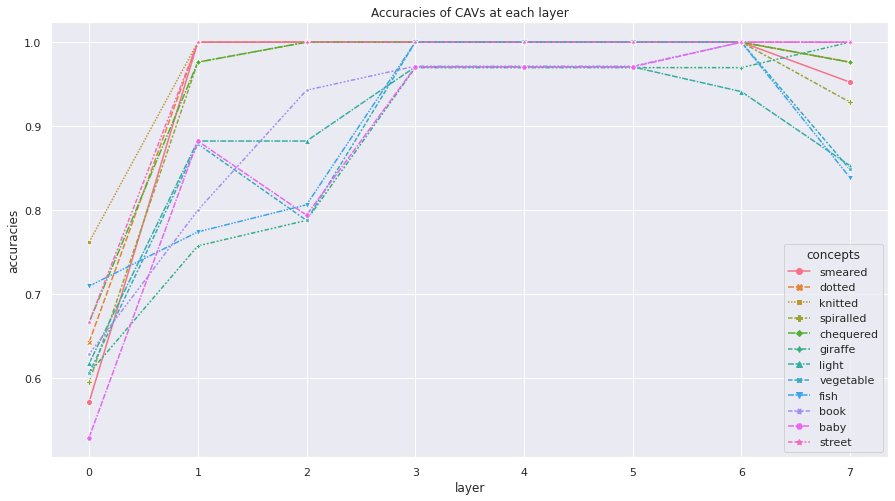

In [70]:
import seaborn as sns
df = pd.DataFrame(accuracies, index = ["smeared", "dotted", "knitted", "spiralled", 
                                       "chequered", "giraffe", "light", "vegetable", "fish", "book", "baby", "street"])
df.index.name = 'concepts'
df_2 = df.transpose()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(data=df_2, markers=True)
ax.set_title('Accuracies of CAVs at each layer')
ax.set_ylabel('accuracies')
ax.set_xlabel('layer')